In [ ]:
# !pip install opencv-python
# !pip install k4a
# !pip install open3d
# !pip install pyk4a

In [1]:
import os
import time
import uuid
import cv2
import numpy as np
import pyk4a
from pyk4a import PyK4A, Config

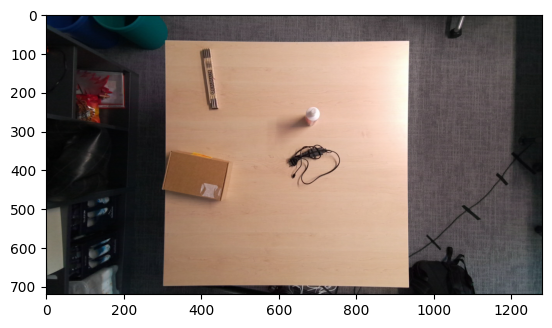

In [2]:
from pyk4a import PyK4A

# Load camera with the default config
k4a = PyK4A()
k4a.start()

# Get the next capture (blocking function)
capture = k4a.get_capture()
img_color = capture.color

# Display with pyplot
from matplotlib import pyplot as plt
plt.imshow(img_color[:, :, 2::-1]) # BGRA to RGB
plt.show()

In [3]:
from typing import Optional, Tuple

def colorize(
    image: np.ndarray,
    clipping_range: Tuple[Optional[int], Optional[int]] = (None, None),
    colormap: int = cv2.COLORMAP_BONE,
) -> np.ndarray:
    if clipping_range[0] or clipping_range[1]:
        img = image.clip(clipping_range[0], clipping_range[1])
    else:
        img = image.copy()
    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    img = cv2.applyColorMap(img, colormap)
    return img

In [19]:
k4a = PyK4A(
        Config(
            color_resolution=pyk4a.ColorResolution.OFF,
            depth_mode=pyk4a.DepthMode.NFOV_UNBINNED,
            synchronized_images_only=False,
        )
    )
k4a.start()

# getters and setters directly get and set on device
k4a.whitebalance = 4500
assert k4a.whitebalance == 4500
k4a.whitebalance = 4510
assert k4a.whitebalance == 4510

while True:
    capture = k4a.get_capture()
    if np.any(capture.depth):
        img = capture.depth
        img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
        img = cv2.applyColorMap(img, cv2.COLORMAP_BONE)
        cv2.imshow("k4a", img)
        key = cv2.waitKey(1000)
        if key != -1:
            cv2.destroyAllWindows()
            break
k4a.stop()


error: OpenCV(4.6.0) /io/opencv/modules/core/src/norm.cpp:1405: error: (-5:Bad argument) Unknown/unsupported norm type in function 'normalize'


[2022-11-18 11:49:13.092] [error] [t=10366] /__w/1/s/extern/Azure-Kinect-Sensor-SDK/src/usbcommand/usbstreaming.c (117): usb_cmd_libusb_cb(). LibUSB transfer status of 00000001 unexpected
[2022-11-18 11:49:13.092] [error] [t=10366] /__w/1/s/extern/Azure-Kinect-Sensor-SDK/src/usbcommand/usbstreaming.c (133): usb_cmd_libusb_cb(). Error LIBUSB transfer failed, result:LIBUSB_TRANSFER_ERROR
[2022-11-18 11:49:13.823] [error] [t=10367] /__w/1/s/extern/Azure-Kinect-Sensor-SDK/src/usbcommand/usbstreaming.c (117): usb_cmd_libusb_cb(). LibUSB transfer status of 00000005 unexpected
[2022-11-18 11:49:13.823] [error] [t=10367] /__w/1/s/extern/Azure-Kinect-Sensor-SDK/src/usbcommand/usbstreaming.c (133): usb_cmd_libusb_cb(). Error LIBUSB transfer failed, result:LIBUSB_TRANSFER_NO_DEVICE
[2022-11-18 11:49:13.823] [error] [t=10367] /__w/1/s/extern/Azure-Kinect-Sensor-SDK/src/usbcommand/usbstreaming.c (117): usb_cmd_libusb_cb(). LibUSB transfer status of 00000005 unexpected
[2022-11-18 11:49:13.823] [err

libusb: error [udev_hotplug_event] ignoring udev action change
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action change
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind
libusb: error [udev_hotplug_event] ignoring udev action bind


In [ ]:
IMAGE_PATH = os.path.join("DataCollection", "images")
OBJECT_CLASS = "test"

OBJECT_PATH = os.path.join(IMAGE_PATH, OBJECT_CLASS)

In [ ]:
# Create images folder
if not os.path.exists(IMAGE_PATH):
    os.mkdir(IMAGE_PATH)

# Create folder for object
if not os.path.exists(OBJECT_PATH):
    os.mkdir(OBJECT_PATH)

## Capture Images from a single camera

In [ ]:
# 0: RGB Azure Kinect
# 2: Sony Alpha

cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    
    frame = cv2.flip(frame,1)
    cv2.imshow('Capture Images', frame)
    
    key = cv2.waitKey(1) & 0xFF
    # Save an image if 'm' key is pressed
    if key == ord('m'):
        file_name = f'{str(uuid.uuid1())}.jpg'
        img_name = os.path.join(OBJECT_PATH, file_name)
        cv2.imwrite(img_name, frame)

    # Stop image capture if 'q' key is pressed
    if key == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

## Capture Images from multiple cameras

This is only needed if images from multiple cameras should be captured at the same time e.g. RGB Image and Depth Image

In [ ]:
# !pip install vidgear

In [ ]:
RGB_IMAGE_PATH = os.path.join(OBJECT_PATH, "rgb")
DEPTH_IMAGE_PATH = os.path.join(OBJECT_PATH, "depth")

In [ ]:
# Create folder for rgb and depth images
if not os.path.exists(RGB_IMAGE_PATH):
    os.mkdir(RGB_IMAGE_PATH)
    
if not os.path.exists(DEPTH_IMAGE_PATH):
    os.mkdir(DEPTH_IMAGE_PATH)

In [ ]:
# From https://stackoverflow.com/a/68342818; Last retrieved: 15.11.2022
from vidgear.gears import VideoGear

# Get multiple video streams
stream1 = VideoGear(source=0, logging=True).start() 
stream2 = VideoGear(source=1, logging=True).start() 

while True:    
    frame1 = stream1.read()
    frame2 = stream2.read()

    if frame1 is None or frame2 is None:
        break
    
    cv2.imshow("Capture Frame1", frame1)
    cv2.imshow("Capture Frame2", frame2)

    key = cv2.waitKey(1) & 0xFF
    # Save an image if 'm' key is pressed
    if key == ord("m"):
        file_name = f'{str(uuid.uuid1())}.jpg'
        rgb_img_name = os.path.join(RGB_IMAGE_PATH, file_name)
        depth_img_name = os.path.join(DEPTH_IMAGE_PATH, file_name)
        
        cv2.imwrite(rgb_img_name, frame1)
        cv2.imwrite(depth_img_name, frame2)
        
    # Stop image capture if 'q' key is pressed
    if key == ord("q"):
        break

cv2.destroyAllWindows()

stream1.stop()
stream2.stop()

In [ ]:
# From https://github.com/UnaNancyOwen/AzureKinectSample/blob/master/sample/python/depth.py
class kinect:
    # Kinect
    _device = None
    _capture = None

    # Depth
    _depth_image = None
    _depth = None

    def __init__(self):
        self.initialize()

    def __del__(self):
        self.finalize()

    def initialize(self):
        self.initialize_sensor()

    def finalize(self):
        self.finalize_sensor()

    def initialize_sensor(self):
        # Open Device
        self._device = k4a.Device.open()

        # Start Cameras
        device_config = k4a.DeviceConfiguration(
            color_format=k4a.EImageFormat.COLOR_BGRA32,
            color_resolution=k4a.EColorResolution.RES_720P,
            depth_mode=k4a.EDepthMode.NFOV_UNBINNED,
            camera_fps=k4a.EFramesPerSecond.FPS_30,
            synchronized_images_only=True
        )
        status = self._device.start_cameras(device_config)
        if status != k4a.EStatus.SUCCEEDED:
            raise IOError("failed start cameras!")

    def finalize_sensor(self):
        # Stop Cameras
        self._device.stop_cameras()

    def run(self):
        while True:
            self.update()
            self.draw()
            self.show()

            key = cv2.waitKey(10)
            if key == ord('q'):
                break

    def update(self):
        self.update_frame()
        self.update_depth()

    def update_frame(self):
        # Capture Frame
        self._capture = self._device.get_capture(-1)
        if self._capture is None:
            raise IOError("failed get capture!")

    def update_depth(self):
        # Update Depth
        self._depth_image = self._capture.depth

    def draw(self):
        self.draw_depth()

    def draw_depth(self):
        # Draw Depth
        self._depth = self._depth_image.data

    def show(self):
        self.show_depth()

    def show_depth(self):
        # Scaling Depth
        self._depth = self._depth * (-255.0 / 5000.0) + 255.0
        self._depth = self._depth.astype(np.uint8)

        # Show Depth
        cv2.imshow("depth", self._depth)